# Project Report

## Introduction

#### Background Information
A computer science research team led by Frank Wood is currently collecting data about how people play video games, specifically Minecraft. To do this, they set up a Minecraft server and meticulously record player actions and data, including their age, experience level, hours of play, whether the player is subscribed, and more. In general, there are three board questions the team is hoping to answer:

1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

2. We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

3. We are interested in demand forecasting, namely, what time windows are most likely to have a large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 


#### Specific Question:

Can the variables experience, age, subscribe, and gender predict played_hours in players.csv?

#### Dataset Description

##### The "Players" dataset contains 7 variables and 196 observations:
 
- __experience__ *(Character)*: How experienced the player is
- __hashedEmail__ *(Character)*: The player's email hashed
- __name__ *(Character)*: The name of the player
- __gender__ *(Character)*: The gender of the player
- __played_hours__ *(Double)*: How many hours the player played
- __Age__ *(Double)*: The age of the player
- __subscribe__ *(logical)*: If the player is subscribed


## Methods


#### Loading Data: 

Data was loaded from "https://raw.githubusercontent.com/JasonCai0522/DSCI100_Datasets/refs/heads/main/players.csv"


In [1]:
# Loading in the Libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(1234)



# Loading in the data
player_data <- read_csv("https://raw.githubusercontent.com/JasonCai0522/DSCI100_Datasets/refs/heads/main/players.csv", show_col_types = FALSE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Wrangling and Cleaning Data: 

To clean the data, we first decided to change the variables __experience__, __gender__, and __subscribe__ from *character* type to *factor* type. Afterwards, to perform a KNN-Regression, 

In [2]:
# Changing data types
player_data_factor <- player_data |> 
        mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
        rename(age = Age) |>
        drop_na(age)


# Selecting the relevent columns
player_data_tidy <- player_data_factor |>
        select(experience, subscribe, played_hours, gender, age)

# Dummy coding experience and gender

# Experience values
pro_vals = ifelse(player_data_tidy$experience == 'Pro', 1, 0)
veteran_vals = ifelse(player_data_tidy$experience == 'Veteran', 1, 0)
regular_vals = ifelse(player_data_tidy$experience == 'Regular', 1, 0)
amateur_vals = ifelse(player_data_tidy$experience == 'Amateur', 1, 0)
beginner_vals = ifelse(player_data_tidy$experience == 'Beginner', 1, 0)

# Gender values
male_vals = ifelse(player_data_tidy$gender == 'Male', 1, 0)
female_vals = ifelse(player_data_tidy$gender == 'Female', 1, 0)
nb_vals = ifelse(player_data_tidy$gender == 'Non-binary', 1, 0)
agender_vals = ifelse(player_data_tidy$gender == 'Agender', 1, 0)
ts_vals = ifelse(player_data_tidy$gender == 'Two-Spirited', 1, 0)

player_data_dummy <- player_data_tidy |>
    mutate(pro = pro_vals, veteran = veteran_vals, regular = regular_vals, amateur = amateur_vals, beginner = beginner_vals) |>
    mutate(male = male_vals, female = female_vals, nb = nb_vals, agender = agender_vals, two_spirited = ts_vals) |>
    mutate(subscribe = ifelse(subscribe == TRUE, 1, 0)) |>
    select(-experience, -gender) 

player_data_dummy

subscribe,played_hours,age,pro,veteran,regular,amateur,beginner,male,female,nb,agender,two_spirited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30.3,9,1,0,0,0,0,1,0,0,0,0
1,3.8,17,0,1,0,0,0,1,0,0,0,0
0,0.0,17,0,1,0,0,0,1,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0.3,22,0,1,0,0,0,1,0,0,0,0
0,0.0,17,0,0,0,1,0,0,0,0,0,0
0,2.3,17,0,0,0,1,0,1,0,0,0,0


#### Summary of Data


### TALK ABOUT SUMMARIZING DATA HERE

In [3]:

mean_values <- summarize(player_data_dummy,
        mean_age = mean(age, na.rm = TRUE),
        mean_hours_played = mean(played_hours, na.rm = TRUE))

mean_values

mean_age,mean_hours_played
<dbl>,<dbl>
20.52062,5.904639


#### Visualizing Data


visualizing data

### Data Analysis

### WRITE THIS LATER

In [4]:
# Splitting data into train and test
players_split <- initial_split(player_data_dummy, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [5]:
# Creating recipe and spec
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ ., data = player_data_dummy) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())


In [6]:
players_vfold = vfold_cv(players_training, v = 5, strata = played_hours)
players_workflow <- workflow() |>
        add_recipe(players_recipe) |>
        add_model(players_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

players_results <- players_workflow |>
        tune_grid(resamples = players_vfold, grid = gridvals) |>
        collect_metrics()

players_results

→ A | warning: !  The following column has zero variance so scaling cannot be used: agender.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,40.504940693,5,9.2590472327,Preprocessor1_Model001
1,rsq,standard,0.003661718,5,0.0004505061,Preprocessor1_Model001
2,rmse,standard,34.192008775,5,7.5815420461,Preprocessor1_Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,rsq,standard,0.06311706,5,0.02605157,Preprocessor1_Model099
100,rmse,standard,27.31597852,5,8.36739403,Preprocessor1_Model100
100,rsq,standard,0.06261832,5,0.02507421,Preprocessor1_Model100


In [7]:
players_rmse <- players_results |>
        filter(.metric == "rmse") 

players_min <- players_rmse |> 
        slice_min(std_err)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,rmse,standard,30.39263,5,6.746096,Preprocessor1_Model006


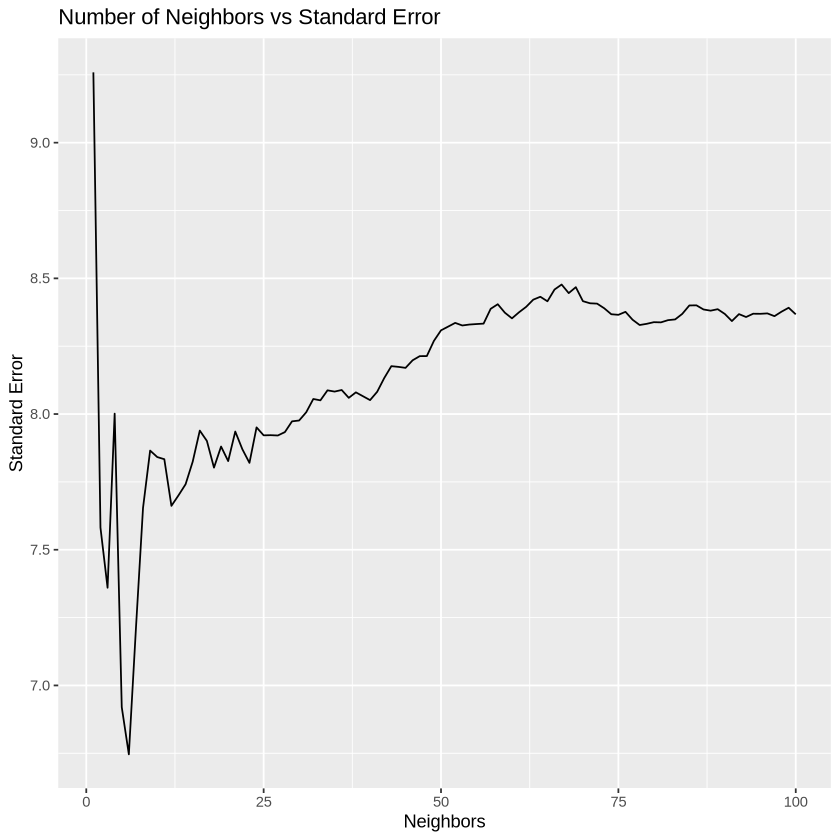

In [8]:
players_rmse |> 
    ggplot(aes(x = neighbors, y = std_err)) +
    geom_line() +
    labs(x = "Neighbors", y = "Standard Error", title = "Number of Neighbors vs Standard Error")

In [9]:
k_min <- players_min |>
         pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = played_hours, estimate = .pred)

players_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.541500e+01
rsq,standard,2.266247e-04
mae,standard,7.135714e+00
